In [1]:
import sys


In [2]:
sys.path.append('../scripts/')

In [3]:
import car_counting_functions as ccf
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import pandas as pd
import os

In [4]:
from PIL import Image 

In [7]:
ant_img = ccf.one_cam_paths("../data/archive/July 6/AntoineW/")

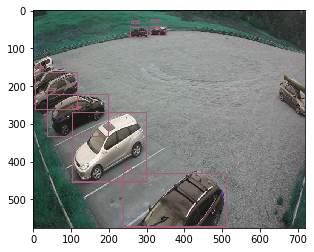

In [80]:
show_image_detection(ant_img[47])

In [48]:
# Opens a image in RGB mode 
im = Image.open(ant_img[45]) 
  
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 
  
# Setting the points for cropped image 
# Setting the points for cropped image 
left = 0
top = 0
right = width
bottom = height/4
  
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
im2 = im.crop((0, height/4, width, height))  
# Shows the image in image viewer 
im2.show() 
  

In [81]:
img = cv2.imread(ant_img[47])


In [88]:
h, w, d = img.shape
h, w

(576, 720)

In [84]:
crop_1 = img[0:(h//4)]
crop_2 = img[(h//4):h]
bbox1, label1, conf1 = cv.detect_common_objects(crop_1)  
bbox2, label2, conf2 = cv.detect_common_objects(crop_2)
car_count_2 = label2.count('truck') + label2.count('car') + label2.count('bus')
car_count_1 = label1.count('truck') + label1.count('car') + label1.count('bus')

car_count = car_count_1 + car_count_2
car_count

#plt.imshow(crop_2)
#plt.show()

4

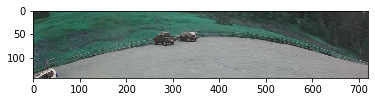

In [85]:
output_image_1 = draw_bbox(crop_1, bbox1, label1, conf1)
plt.imshow(output_image_1)
plt.show()

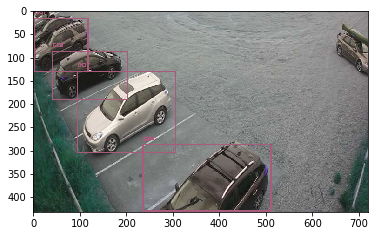

In [87]:
output_image_2 = draw_bbox(crop_2, bbox2, label2, conf2)
plt.imshow(output_image_2)
plt.show()

In [45]:
height/4

144.0

In [ ]:
left = 1
top = height
right = width
bottom = 3 * height / 4

In [22]:
print(left, top, right, bottom)

1 576 720 432.0


In [19]:
im.size

(720, 576)

In [33]:
im.show()

In [6]:
def show_image_detection(image_path):
    '''
    Displays the objects detected in an image with color coded labels and bounding boxes

    Parameters
    ----------
    image_path : string
        File path to jpg image.

    Returns
    -------
    Image with objects labeled

    '''
    # read in image
    im = cv2.imread(image_path)
    # detect objects in image
    bbox, label, conf = cv.detect_common_objects(im)
    
    # plot all objects in image with bounding boxes
    output_image = draw_bbox(im, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()


In [ ]:
im.tile = [e for e in im.tile if e[1][2] < 2181 and e[1][3]<1294]